In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline

In [2]:
#Q1
from scipy.stats import bernoulli
import math

In [3]:
c1 = lambda p:  bernoulli.rvs(p, size=1)
c2 = lambda p:  bernoulli.rvs(p, size=1)
coins = [c1(0.4),c2(0.6)]


In [4]:

def eps_greedy(N,eps):
    d = 2
    coins_selected = []
    numbers_of_selections = [1] * 2
    sums_of_reward = [0] * 2
    total_reward = 0
    reward_acc = []
    for n in range(0, N):
        choice = np.random.choice(2,p = [eps,1-eps])
        if(choice==0):
            coin = np.random.choice(2)
            reward =  bernoulli.rvs(p[coin], size=1)[0]
            numbers_of_selections[coin] += 1
        else:
            average_reward_c0 = sums_of_reward[0] / numbers_of_selections[0]
            average_reward_c1 = sums_of_reward[1] / numbers_of_selections[1]
            if(average_reward_c0 >average_reward_c1):
                coin = 0
            else:
                coin = 1
            numbers_of_selections[coin] += 1
            reward =  bernoulli.rvs(p[coin], size=1)[0]
#         coins_selected.append(coin)
        
#         reward = 
#         sums_of_reward[ad] += reward
        total_reward += reward
        reward_acc.append(total_reward)
    return reward_acc

In [8]:
def UCB(N):
    coins_selected = []
    numbers_of_selections = [0] * 2
    sums_of_reward = [0] * 2
    total_reward = 0
    reward_acc = []
    for n in range(0, N):
        coin = 0
        max_upper_bound = 0
        for i in range(0, 2):
            if (numbers_of_selections[i] > 0):
                average_reward = sums_of_reward[i] / numbers_of_selections[i]
                delta_i = math.sqrt(2 * math.log(n+1) / numbers_of_selections[i])
                upper_bound = average_reward + delta_i
            else:
                upper_bound = 1e7
            if upper_bound > max_upper_bound:
                max_upper_bound = upper_bound
                coin = i
#         print(coin)
        coins_selected.append(coin)
        numbers_of_selections[coin] += 1
        reward =  bernoulli.rvs(p[coin], size=1)[0]
#         print(reward)
        sums_of_reward[coin] += reward
        total_reward += reward
        reward_acc.append(total_reward)
    return reward_acc

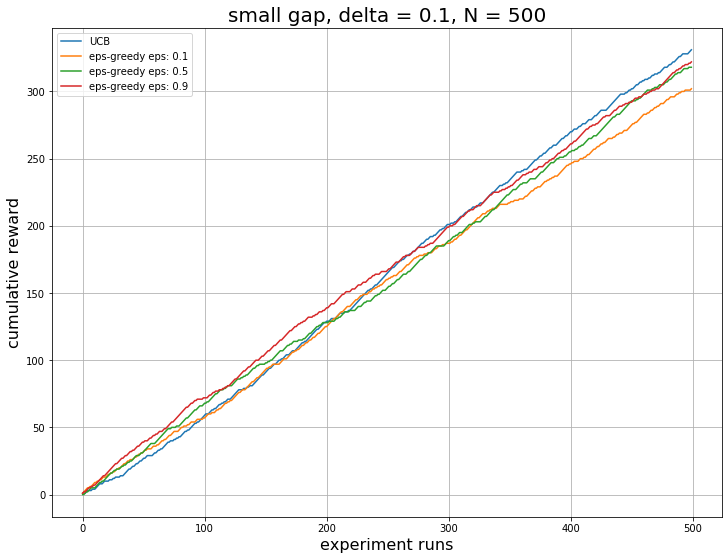

In [9]:
p =  [0.7,0.6]
N = 500
plt.figure(figsize=(12,9))

plt.plot(UCB(N), label = 'UCB')
plt.plot(eps_greedy(N,0.1), label = 'eps-greedy eps: 0.1')
plt.plot(eps_greedy(N,0.5), label = 'eps-greedy eps: 0.5')
plt.plot(eps_greedy(N,0.9), label = 'eps-greedy eps: 0.9')
plt.title("small gap, delta = 0.1, N = 500",size = 20)
plt.legend()
plt.ylabel("cumulative reward",size = 16)
plt.xlabel("experiment runs",size =16)
plt.grid()
plt.savefig("small_gap.png",dpi = 150)

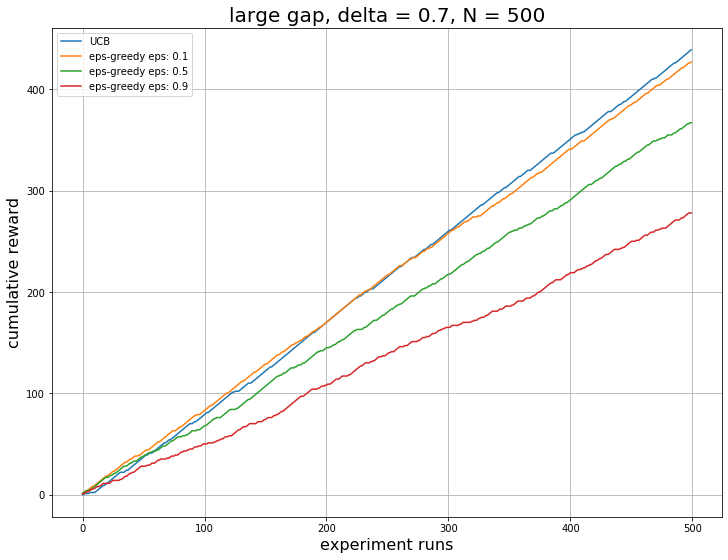

In [10]:
N = 500
p =  [0.2,0.9]
plt.figure(figsize=(12,9))

plt.plot(UCB(N), label = 'UCB')
plt.plot(eps_greedy(N,0.1), label = 'eps-greedy eps: 0.1')
plt.plot(eps_greedy(N,0.5), label = 'eps-greedy eps: 0.5')
plt.plot(eps_greedy(N,0.9), label = 'eps-greedy eps: 0.9')
plt.title("large gap, delta = 0.7, N = 500",size = 20)
plt.legend()
plt.ylabel("cumulative reward",size = 16)
plt.xlabel("experiment runs",size =16)
plt.grid()
plt.savefig("big_gap.png",dpi = 150)